# Logistic Regression (Bank Full)

Shubham's Assignment

In [1]:
#import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, auc
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data
bank = pd.read_csv("bank-full.csv",sep=";")
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
#data analysis

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank.shape

(45211, 17)

In [7]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [10]:
#Graphical Visualization

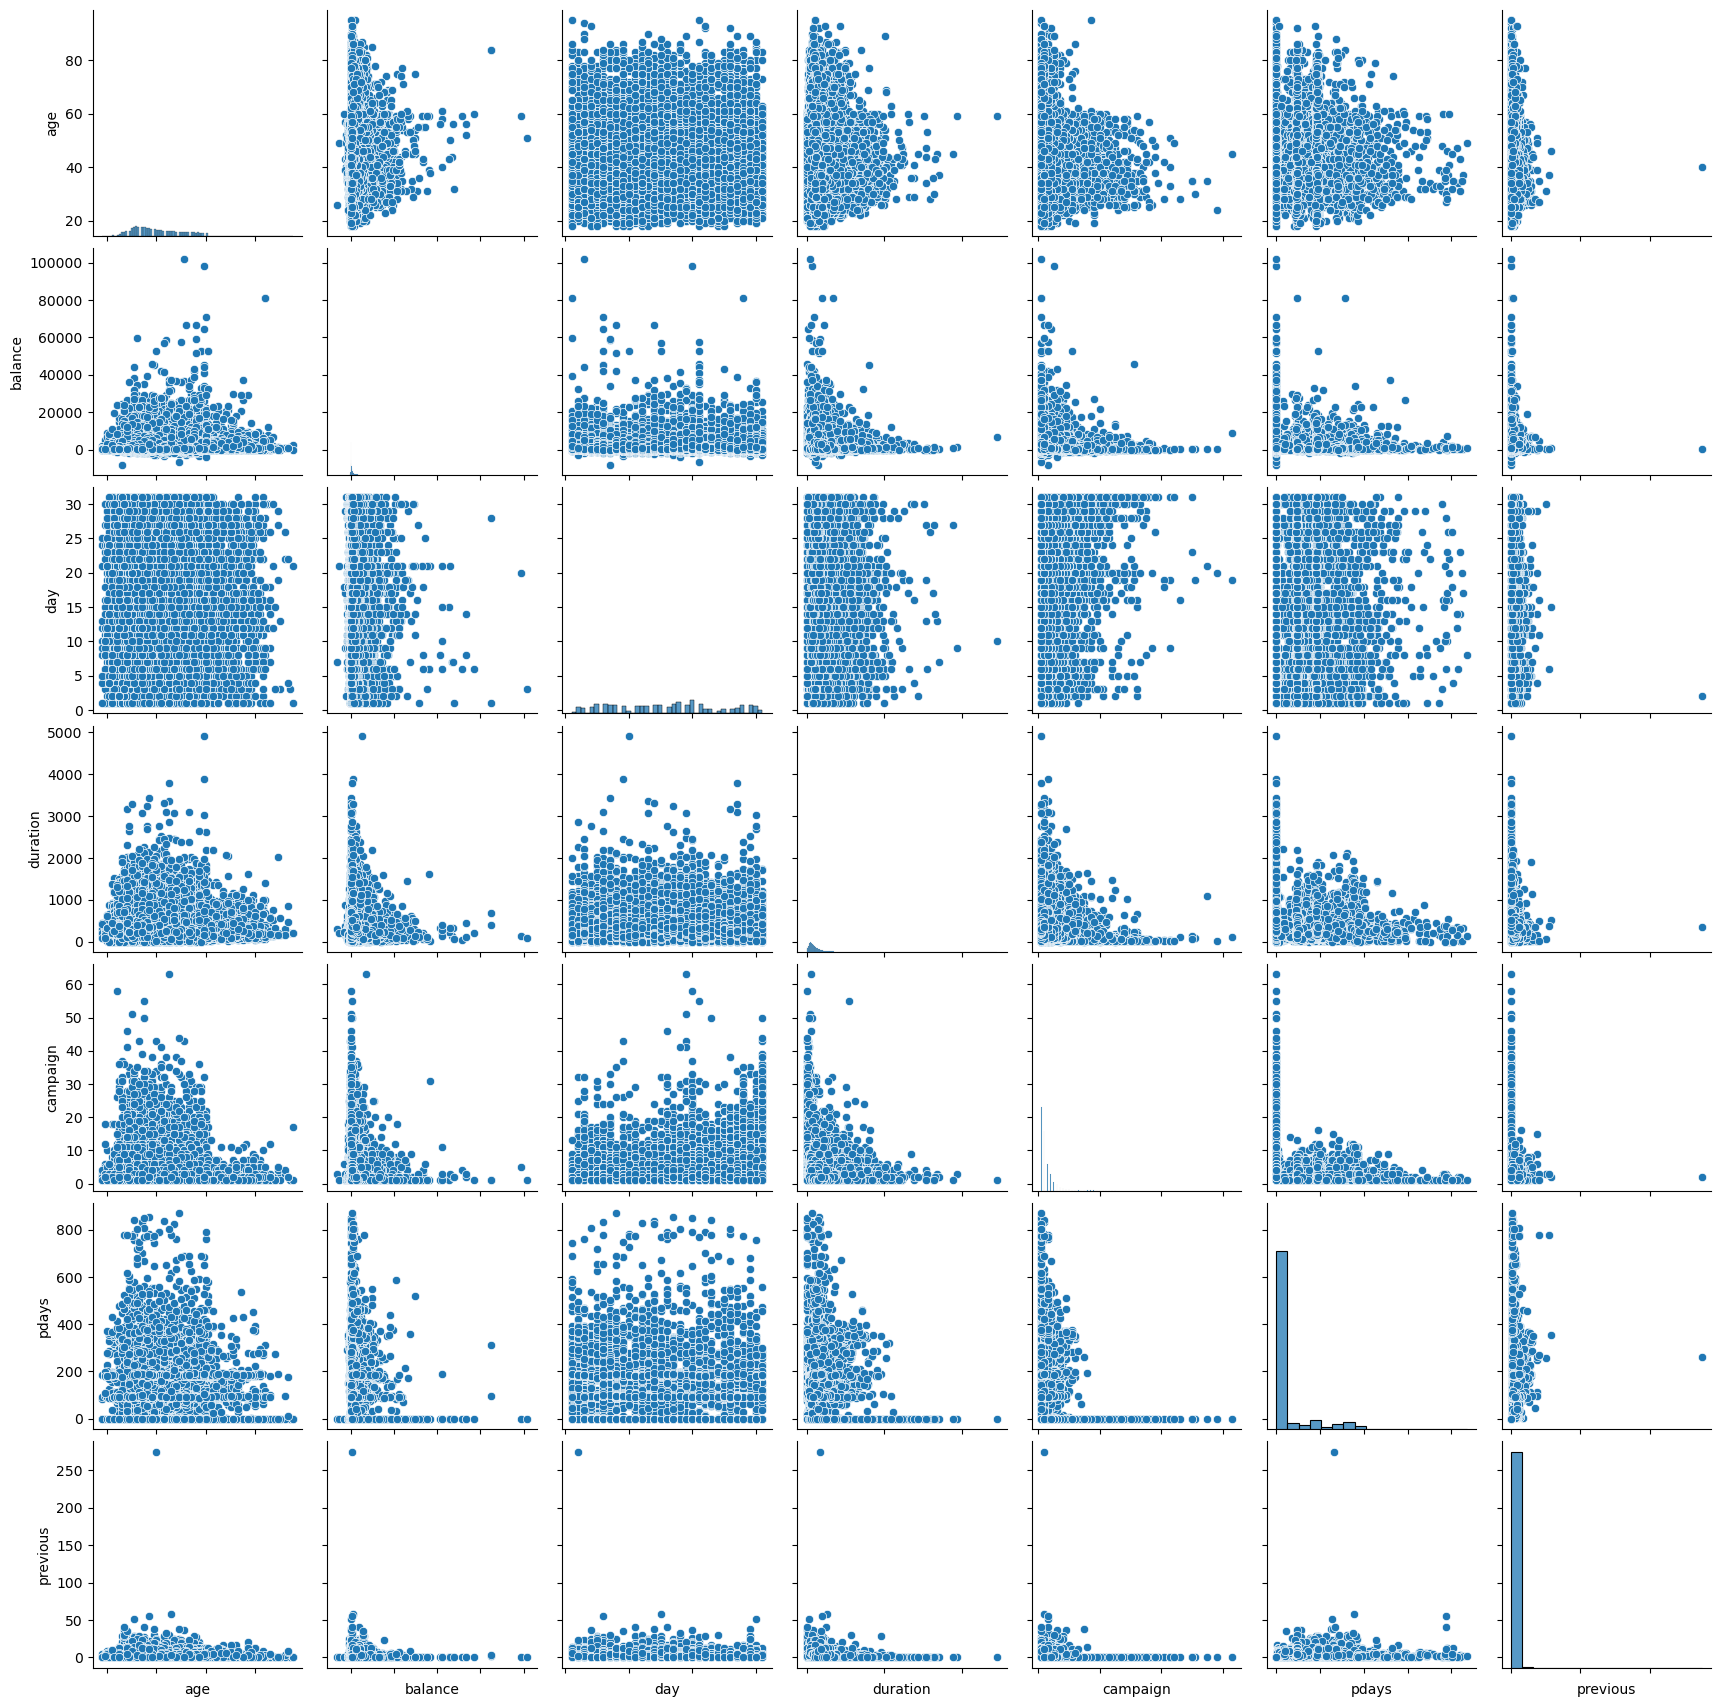

In [11]:
g = sns.pairplot(bank)
g.set(xticklabels=[])
plt.show()

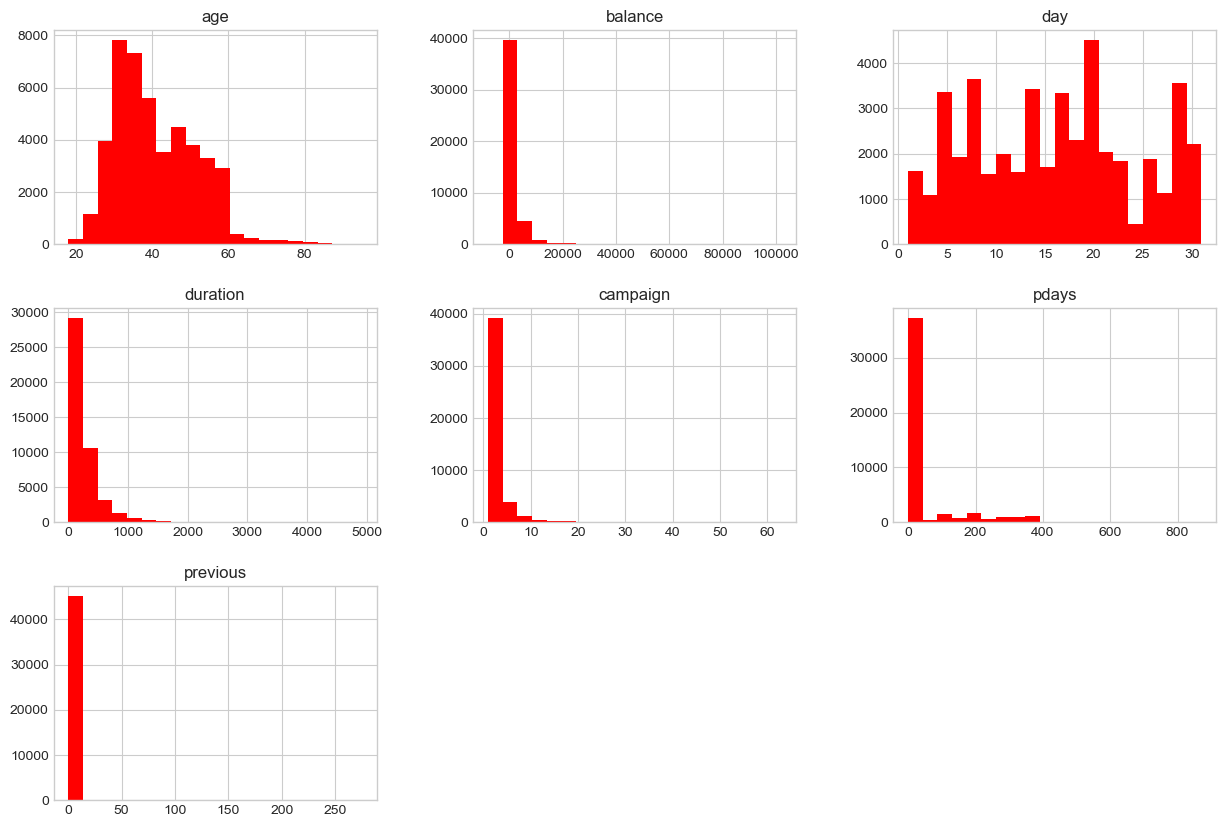

In [12]:
plt.style.use('seaborn-whitegrid')
bank.hist(bins=20, figsize=(15,10), color='red')
plt.show()

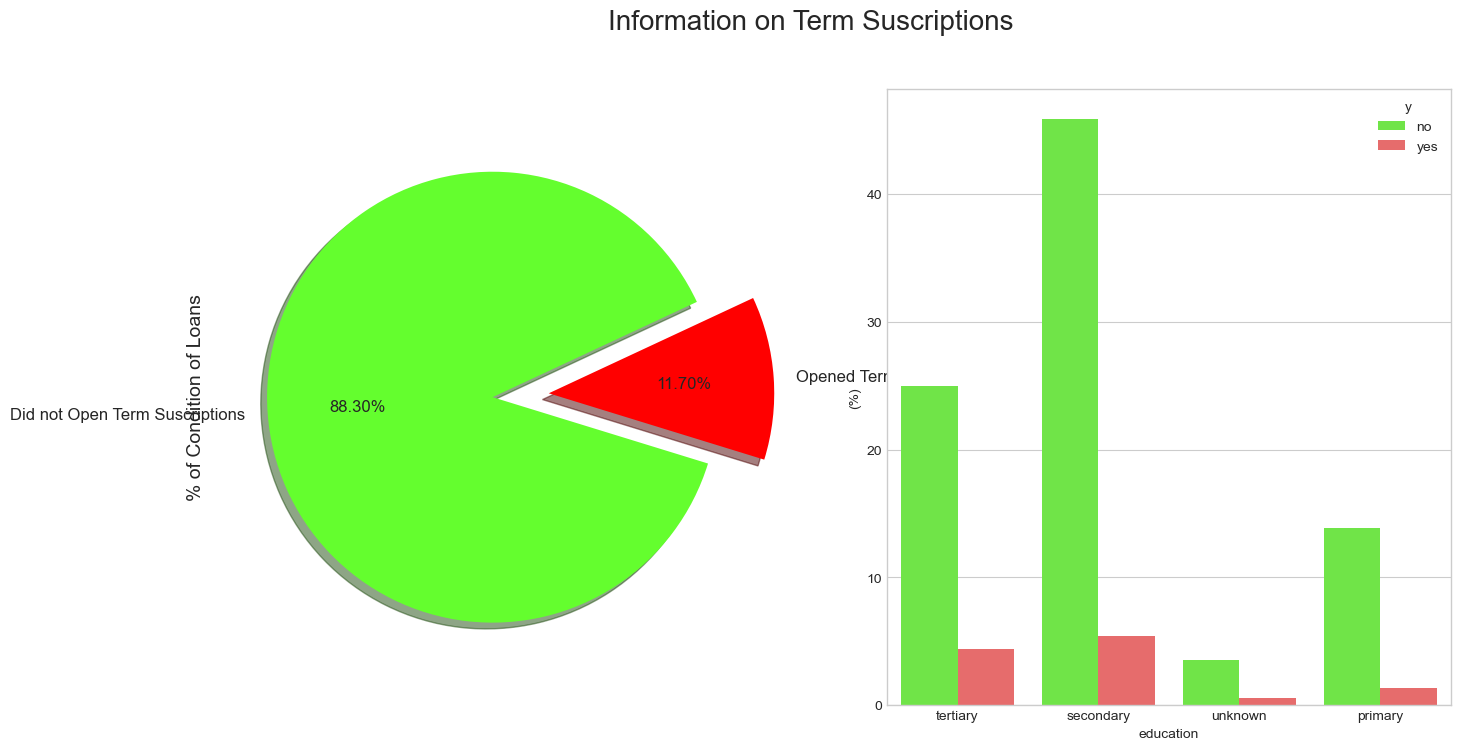

In [13]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#64FE2E", "#FF0000"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

bank["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=bank, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="y", data=bank, palette=palette, estimator=lambda x: len(x) / len(bank) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(bank["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

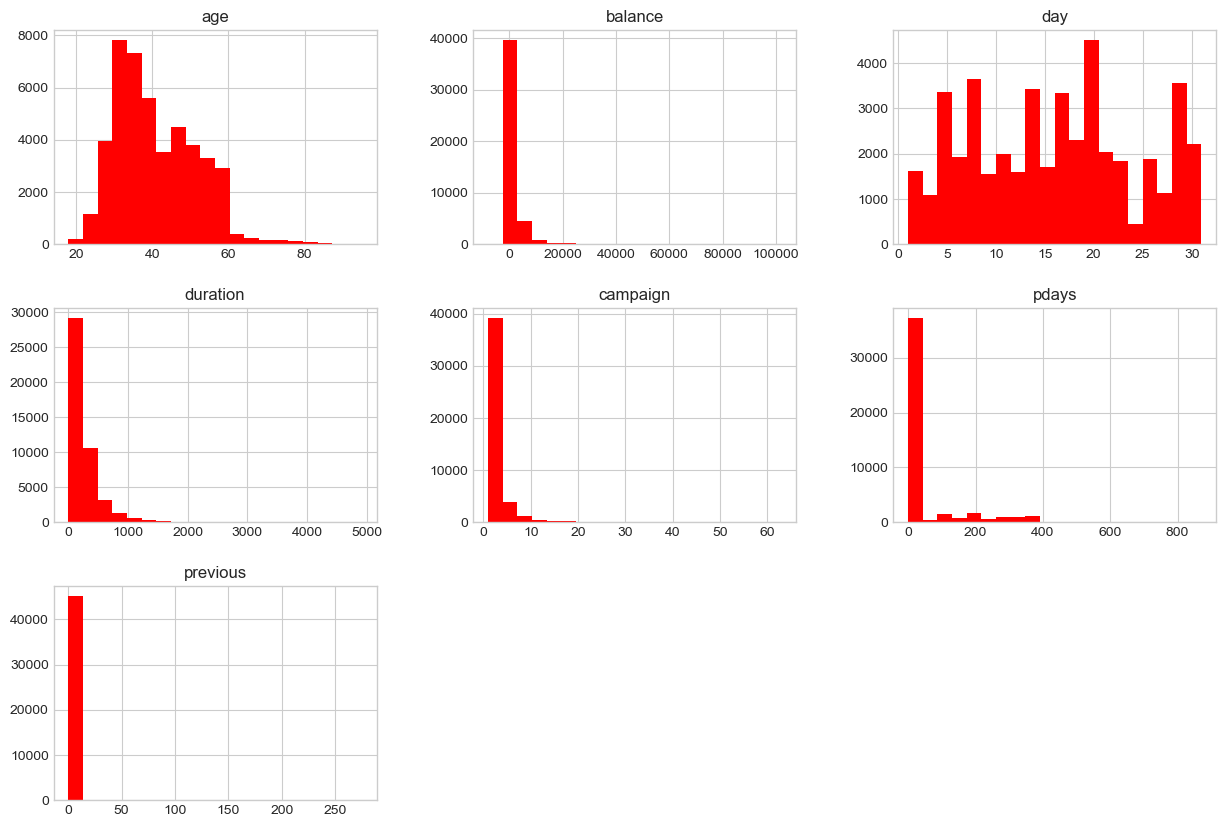

In [14]:
plt.style.use('seaborn-whitegrid')
bank.hist(bins=20, figsize=(15,10), color='red')
plt.show()

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
bank["job"] = label_encoder.fit_transform(bank["job"])
bank["marital"] = label_encoder.fit_transform(bank["marital"])
bank["education"] = label_encoder.fit_transform(bank["education"])  
bank["default"] = label_encoder.fit_transform(bank["default"])
bank["housing"] = label_encoder.fit_transform(bank["housing"]) 
bank["loan"] = label_encoder.fit_transform(bank["loan"])
bank["contact"] = label_encoder.fit_transform(bank["contact"])
bank["month"] = label_encoder.fit_transform(bank["month"])
bank["poutcome"] = label_encoder.fit_transform(bank["poutcome"])
bank["y"] = label_encoder.fit_transform(bank["y"])

In [16]:
bank.corr()['y'][:].plot.bar()

<AxesSubplot:>

In [17]:
import numpy as np
fig, ax = plt.subplots(figsize=(13,10))

mask = np.zeros_like(bank.corr())
mask[np.triu_indices_from(mask, 1)] = True

sns.heatmap(bank.corr(), annot=True,mask=mask, cmap='viridis',linewidths=0.5,ax=ax, fmt='.3f')

rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
roty = ax.set_yticklabels(ax.get_yticklabels(), rotation=30)

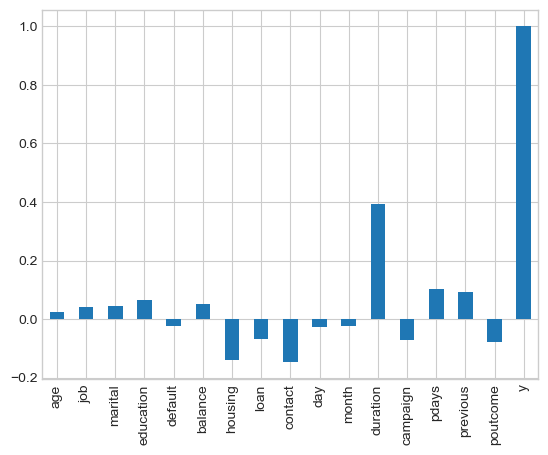

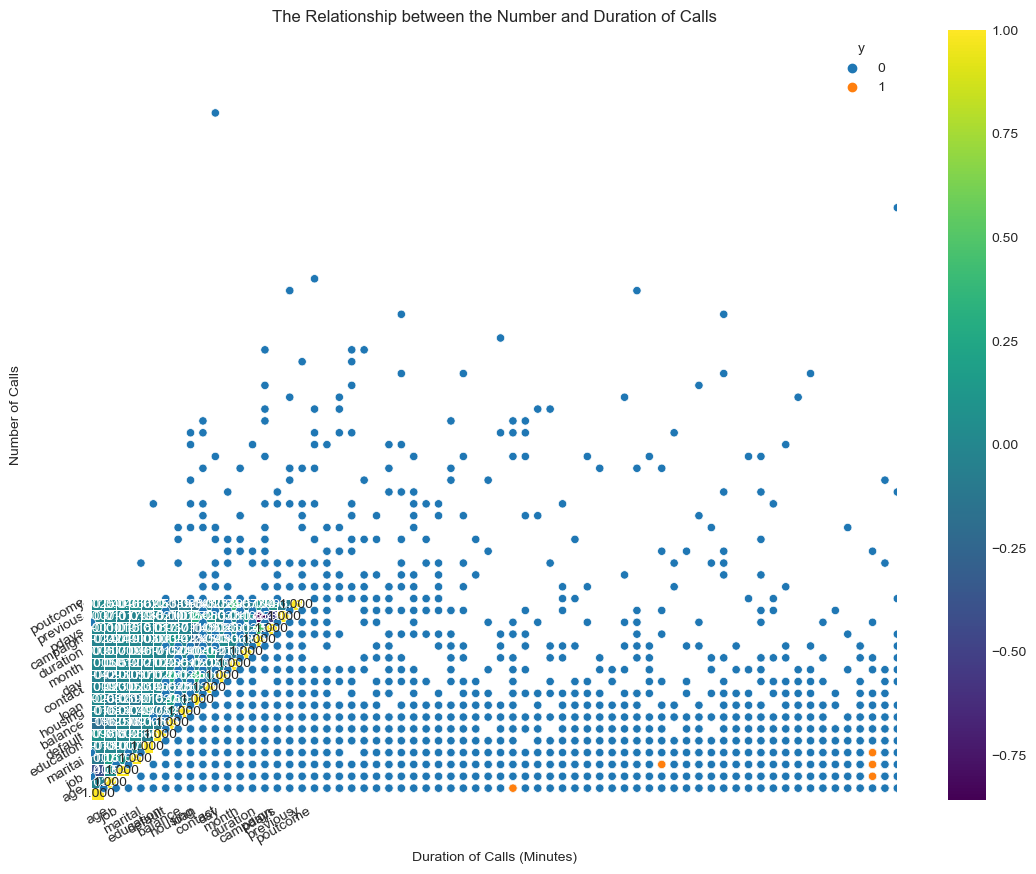

In [18]:
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = bank,
                     hue = 'y')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
plt.show()

In [19]:
# dropping the case number columns as it is not required
bank1= bank.iloc[:,[0,1,2,3,4,5,6,7,16]]

In [20]:
bank1

,age,job,marital,education,default,balance,housing,loan,y
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,33,2,1,1,0,2,1,1,0
3,47,1,1,3,0,1506,1,0,0
4,33,11,2,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,1
45207,71,5,0,0,0,1729,0,0,1
45208,72,5,1,1,0,5715,0,0,1
45209,57,1,1,1,0,668,0,0,0


In [21]:
bank1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
y            0
dtype: int64

In [22]:
# Dividing our data into input and output variables 
X = bank1.iloc[:,:-2]
X

,age,job,marital,education,default,balance,housing
0,58,4,1,2,0,2143,1
1,44,9,2,1,0,29,1
2,33,2,1,1,0,2,1
3,47,1,1,3,0,1506,1
4,33,11,2,3,0,1,0
...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0
45207,71,5,0,0,0,1729,0
45208,72,5,1,1,0,5715,0
45209,57,1,1,1,0,668,0


In [23]:
Y = bank1.iloc[:,-1]
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [24]:
#build model

In [25]:
#split into training and test data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.3, random_state=0)

In [27]:
print(X_train.shape)

(31647, 7)


In [28]:
print(X_test.shape)

(13564, 7)


In [29]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [30]:
print("Training Accuracy :\t ", lr_clf.score(X_train, y_train))

Training Accuracy :	  0.8831168831168831


In [31]:
print("Testing Accuracy :\t  ",  lr_clf.score(X_test, y_test))

Testing Accuracy :	   0.882114420524919


In [32]:
y_pred = lr_clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
from sklearn import metrics
metrics.confusion_matrix(y_pred, y_test)

array([[11965,  1595],
       [    4,     0]], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print (cm)

[[11965     4]
 [ 1595     0]]


In [35]:
#confusion matrix

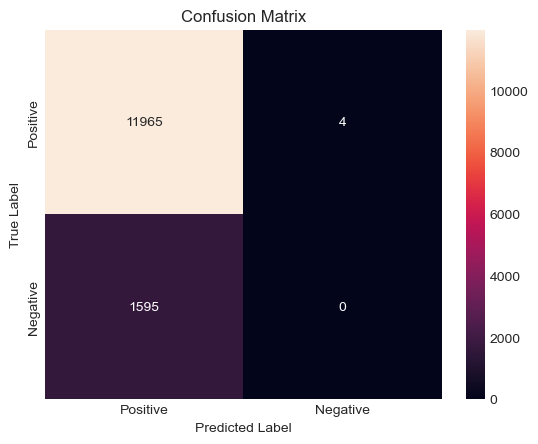

In [36]:
cm = confusion_matrix(y_test, y_pred)

class_label = ["Positive", "Negative"]
cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.00      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



In [38]:
#ROC Curve

In [39]:
y_predictProb = lr_clf.predict_proba(X_train)

fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])

roc_auc = auc(fpr, tpr)

print("auc :-",roc_auc)

auc :- 0.617896574246147


In [40]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [41]:
prob=lr_clf.predict_proba(X_train)
prob=prob[:,1]

new_pred= pd.DataFrame({'actual': y_test,"pred":0})

In [42]:
new_pred

,actual,pred
14001,0,0
32046,1,0
13318,0,0
42991,0,0
14237,0,0
...,...,...
2666,0,0
35730,0,0
11495,0,0
20975,0,0


In [43]:
cm_new=confusion_matrix(new_pred.actual,new_pred.pred)
cm_new

array([[11969,     0],
       [ 1595,     0]], dtype=int64)

In [45]:
print(classification_report(new_pred.actual,new_pred.pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.00      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



In [46]:
# Done